
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd

In [2]:
medical_df = pd.read_csv(r'D:\ml_course\Модуль 2. Навчання з учителем\dataframes\medical-charges.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Можливі методи прогнозування:
1. Зробити кореляційний аналіз числових колонок та подивитись чи корелює age, bmi, children з charges.
2. Зробити аналіз категоріальних колонок такі як sex, smoker, region. Наприклад хто більше плате курці чи ті хто не курить, жінки чи чоловіки, чи впливає район на суму страхових внесків.
3. Також можна перевірити як smoker + bmi впливає на charges. Може бути курець з великим bmi то і витрати будуть більші, і навпаки.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [4]:
import plotly.express as px

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['yellow', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Спостереження:
Розподіл медичних витра для жінок та чоловіків є схожим. Медіанні значення практично одинакові. Третій квартиль для чоловіків вищий ніж для жінок. Спостерігається наявність викидів що для жінок що для чоловіків. Тож стать не можна вважати визначальним фактором рівня медичних витрат.

In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'blue', 'gray', 'orange'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Спостереження:
Розподіл медичних витрат у різних регіонах має подібну форму. Медіанні значення між регіонами в межах 9000 - 10000 $, в усіх регіонах присутні викиди. То зробити висновок, що регіон проживання не має суттєвого впливу на величину медичних витрат.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [7]:
fig = px.histogram(medical_df, x='smoker', color='region', title='Smoker vs Region')
fig.show()

### Спостереження:
Курці та некурці присутні в усіх регіонах. Візуально не спостерігається значних відмінностей у часині курців між регіонами, що свідчить про відсутність сильного зв’язку між регіоном проживання та фактом куріння.

In [8]:
fig = px.histogram(medical_df, x='smoker', color='children', title='Smoker vs Children')
fig.show()

### Спостереження:
Як курці так і не курці мають 0-2 дітей. Зі збільшенням кількості дітей кількість спостережень зменшується. Якогось великого взаємозв'язку між курінням і кількістю дітей не спостерігається.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [9]:
fig = px.violin(medical_df, 
                x='children', 
                y='charges',
                title='Charges vs Children')
fig.show()

### Спостереження:
Майже у всіх групах присутні викиди, люди які мають 5 дітей максимальна сума медичних витрат найменша. Чіткої залежності мід кількістю дітей та медичними витратами не виявлено.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [15]:
import matplotlib.pyplot as plt

In [16]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [17]:
def estimate_charges(age, w, b):
    return w * age + b

In [18]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

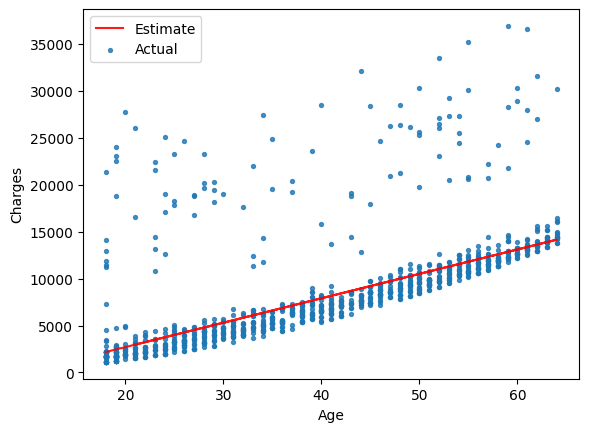

In [37]:
try_parameters(non_smoker_df, 260, -2500)

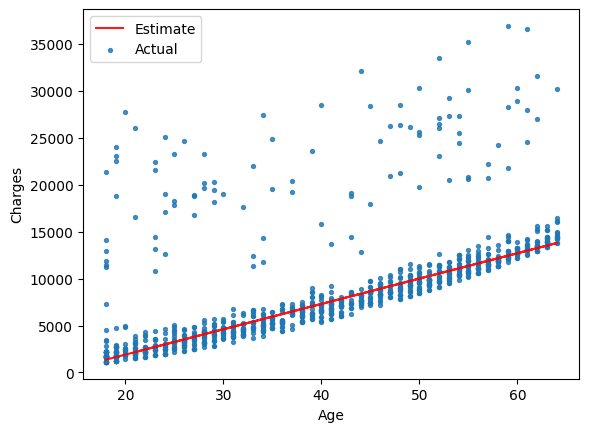

In [31]:
try_parameters(non_smoker_df, 270, -3500)

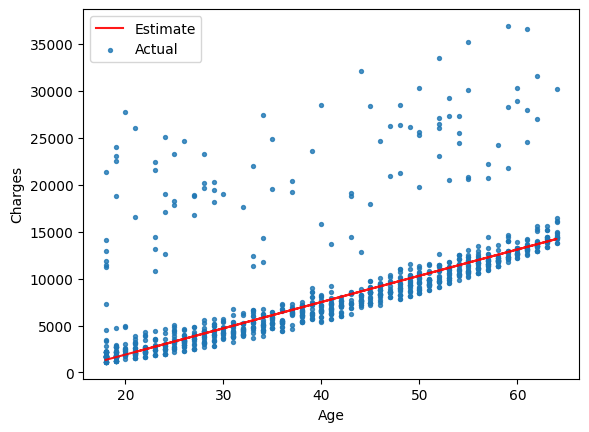

In [36]:
try_parameters(non_smoker_df, 280, -3700)

### Спостереження:
При зміні параметра w змінюється нахил лінії: більші значення w призводять до зростання витрат з віком. Параметр b відповідає за вертикальний зсув лінії та впливає на базовий рівень витрат. Для різних комбінацій параметрів ліная по різному наближається до реальних данних.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [47]:
import numpy as np

In [58]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
targets = non_smoker_df['charges']

In [63]:
w = 260
b = -2500
predicted = estimate_charges(non_smoker_df.age, w, b)
print(f'RMSE:, {rmse(targets, predicted):.2f}')

RMSE:, 4714.99


In [64]:
w = 270
b = -3500
predicted = estimate_charges(non_smoker_df.age, w, b)
print(f'RMSE:, {rmse(targets, predicted):.2f}')

RMSE:, 4840.56


In [65]:
w = 280
b = -3700
predicted = estimate_charges(non_smoker_df.age, w, b)
print(f'RMSE:, {rmse(targets, predicted):.2f}')

RMSE:, 4795.34


### Спостереження:
Метод проб і помилок полягає у підбиранні різних значень w та b і виборі тих, для яких значення RMSE є мінімальним. Найнижче RMSE: 4714 яке я зміг досягти. Ця стратегія може включати поступову зміну параметрів. Це не є дуже ефективним при великій кількості данних. Як було показано в лекції існує 2 найкращі методи які реалізуються автоматично такі як метод найменших квадратів та градієнтний спуск.